In [1]:
%pip install --q pandas
%pip install --q numpy
%pip install --q matplotlib
%pip install --q seaborn
%pip install --q scikit-learn
%pip install --q xgboost

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Before Merging

In [2]:
def load_and_explore_data(projects_path, outcomes_path):
    projects_df = pd.read_csv(projects_path)
    outcomes_df = pd.read_csv(outcomes_path)

    #basic information
    print("Projects Dataset shape:", projects_df.shape)
    print(f"\nColumn names ({len(projects_df.columns)}):")
    print(projects_df.columns.tolist())
    print("\nFirst few rows:")
    display(projects_df.head(3).T)

    print("Outcomes Dataset shape:", outcomes_df.shape)
    print(f"\nColumn names ({len(outcomes_df.columns)}):")
    print(outcomes_df.columns.tolist())
    print("\nFirst few rows:")
    display(outcomes_df.head(3).T)

    #looking for duplicates before merging
    print(f"Projects duplicates: {projects_df.duplicated().sum()}")
    print(f"Outcomes duplicates: {outcomes_df.duplicated().sum()}")

    #missing values before merging
    print("\nPercentage of missing values in projects_df:")
    print((projects_df.isnull().mean() * 100).round(2).sort_values(ascending=False))
    print("\nPercentage of missing values in outcomes_df:")
    print((outcomes_df.isnull().mean() * 100).round(2).sort_values(ascending=False))
    #can drop secondary_focus_subject and secondary_focus_area after merging, having 30% data missing

    print("\n--- Data Types in projects_df ---")
    print(projects_df.dtypes.sort_values())
    print("\n--- Data Types in outcomes_df ---")
    print(outcomes_df.dtypes.sort_values())

    return projects_df, outcomes_df

In [3]:
projects_path = 'Datasets/projects.csv'
outcomes_path = 'Datasets/outcomes.csv'

projects_df, outcomes_df = load_and_explore_data(projects_path, outcomes_path)

Projects Dataset shape: (664098, 35)

Column names (35):
['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid', 'school_latitude', 'school_longitude', 'school_city', 'school_state', 'school_zip', 'school_metro', 'school_district', 'school_county', 'school_charter', 'school_magnet', 'school_year_round', 'school_nlns', 'school_kipp', 'school_charter_ready_promise', 'teacher_prefix', 'teacher_teach_for_america', 'teacher_ny_teaching_fellow', 'primary_focus_subject', 'primary_focus_area', 'secondary_focus_subject', 'secondary_focus_area', 'resource_type', 'poverty_level', 'grade_level', 'fulfillment_labor_materials', 'total_price_excluding_optional_support', 'total_price_including_optional_support', 'students_reached', 'eligible_double_your_impact_match', 'eligible_almost_home_match', 'date_posted']

First few rows:


,0,1,2
projectid,316ed8fb3b81402ff6ac8f721bb31192,90de744e368a7e4883223ca49318ae30,32943bb1063267de6ed19fc0ceb4b9a7
teacher_acctid,42d43fa6f37314365d08692e08680973,864eb466462bf704bf7a16a585ef296a,37f85135259ece793213aca9d8765542
schoolid,c0e6ce89b244764085691a1b8e28cb81,d711e47810900c96f26a5d0be30c446d,665c3613013ba0a66e3a2a26b89f1b68
school_ncesid,63627006187.0,483702008193.0,410327000109.0
school_latitude,36.57634,32.911179,45.166039
school_longitude,-119.608713,-96.72364,-122.414576
school_city,Selma,Dallas,Colton
school_state,CA,TX,OR
school_zip,93662.0,75243.0,97017.0
school_metro,NaN,urban,rural


Outcomes Dataset shape: (619326, 12)

Column names (12):
['projectid', 'is_exciting', 'at_least_1_teacher_referred_donor', 'fully_funded', 'at_least_1_green_donation', 'great_chat', 'three_or_more_non_teacher_referred_donors', 'one_non_teacher_referred_donor_giving_100_plus', 'donation_from_thoughtful_donor', 'great_messages_proportion', 'teacher_referred_count', 'non_teacher_referred_count']

First few rows:


,0,1,2
projectid,ffffc4f85b60efc5b52347df489d0238,ffffac55ee02a49d1abc87ba6fc61135,ffff97ed93720407d70a2787475932b0
is_exciting,f,f,f
at_least_1_teacher_referred_donor,NaN,f,f
fully_funded,f,t,t
at_least_1_green_donation,NaN,t,t
great_chat,f,f,t
three_or_more_non_teacher_referred_donors,NaN,t,t
one_non_teacher_referred_donor_giving_100_plus,NaN,f,t
donation_from_thoughtful_donor,NaN,f,f
great_messages_proportion,NaN,57.0,100.0


Projects duplicates: 0
Outcomes duplicates: 0

Percentage of missing values in projects_df:
secondary_focus_subject                   31.30
secondary_focus_area                      31.30
school_metro                              12.33
school_ncesid                              6.44
fulfillment_labor_materials                5.28
school_district                            0.14
students_reached                           0.02
primary_focus_subject                      0.01
primary_focus_area                         0.01
resource_type                              0.01
poverty_level                              0.00
projectid                                  0.00
grade_level                                0.00
teacher_teach_for_america                  0.00
total_price_excluding_optional_support     0.00
total_price_including_optional_support     0.00
eligible_double_your_impact_match          0.00
eligible_almost_home_match                 0.00
teacher_ny_teaching_fellow                 0

### Merging Datasets and Cleaning + Preprocessing

In [4]:
def merge_and_clean(projects_df, outcomes_df):
    df = pd.merge(projects_df, outcomes_df[['projectid', 'fully_funded']], on='projectid', how='inner')
    print(f"\nMerged dataset shape: {df.shape}") #lost 44772 rows from projects_df @ merging

    # Dropped columns: not needed (such as longitude/ncesid) + redundant such as 'secondary focus subject'

    columns_to_drop = [
        'school_ncesid', 'school_latitude', 'school_longitude', 'school_city',
        'school_state', 'school_district', 'school_county','teacher_teach_for_america','teacher_ny_teaching_fellow',
        'secondary_focus_subject', 'secondary_focus_area', 'primary_focus_subject'
    ]
    df.drop(columns=columns_to_drop, inplace=True)
    return df

In [5]:
def handle_missing_values(df):
    '''     
    Imputes the missing values in categorical variables with 
    mode and numerical values with the mean
    '''

    print("Missing values in the Merged Dataset:\n")
    print(df.isnull().sum())
    
    cat_cols = ['school_zip', 'school_metro', 'primary_focus_area', 'resource_type', 'grade_level']
    for col in cat_cols:
        df[col] = df[col].fillna(df[col].mode()[0])

    num_cols = ['fulfillment_labor_materials', 'students_reached']
    for col in num_cols:
        df[col] = df[col].fillna(df[col].median())

    print("\nMissing values after imputation:\n")
    print(df.isnull().sum())
    return df


In [6]:
def preprocess_data(df, columns_to_encode):

    """
    Preprocess data: 
    - handling bool columns
    - one-hot encoding for specified columns
    - handling ID columns numeric conversion
    - handling date column
    """   
    # Create a copy to avoid modifying original dataframe
    processed_df = df.copy()

    # One-hot encode specified columns
    print("Starting preprocessing...")
    
    for column in columns_to_encode:
        if column in processed_df.columns:
            # Create dummy variables
            dummies = pd.get_dummies(
                processed_df[column], 
                prefix=column.lower().replace(' ', '_'),
                drop_first=True
            ).astype(int)
            # Drop original column and add encoded columns
            processed_df.drop(column, axis=1, inplace=True)
            processed_df = pd.concat([processed_df, dummies], axis=1)
            print(f"Encoded {column} into {dummies.shape[1]} dummy variables")

    #coverting boolean columns
    bool_columns = [
        'fully_funded', 'school_charter', 'school_magnet', 'school_year_round',
        'school_nlns', 'school_kipp', 'school_charter_ready_promise',
        'teacher_teach_for_america', 'teacher_ny_teaching_fellow',
        'eligible_double_your_impact_match', 'eligible_almost_home_match'
    ]
    for col in bool_columns:
        if col in processed_df.columns:
            processed_df[col] = processed_df[col].map({'t': 1, 'f': 0})

    # ID columns (simple numeric conversion) -> using factorize to keep it unique: did it for sake of cleaning
    id_columns = ['schoolid', 'teacher_acctid']
    for col in id_columns:
        if col in processed_df.columns:
            processed_df[col], _ = pd.factorize(processed_df[col])

    # Convert date column to datetime, TODO: not sure if needed but did for the sake of cleaning
    if 'date_posted' in processed_df.columns:
        processed_df['date_posted'] = pd.to_datetime(processed_df['date_posted'], errors='coerce')
        processed_df['days_since_posted'] = (pd.to_datetime('today') - processed_df['date_posted']).dt.days 
        processed_df.drop(columns=['date_posted'], inplace=True) #not needed


        return processed_df

In [24]:
def plot_correlation_matrix(df, drop_columns=['projectid']):
    correlation_df = df.drop(columns=drop_columns, errors='ignore')
    correlation_matrix = correlation_df.corr()
    #print(correlation_matrix)

    plt.figure(figsize=(20,15))
    sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, center=0)
    plt.title("Correlation Matrix", fontsize=16)
    plt.show()

    return correlation_matrix

In [8]:
#merge & clean
merged_df = merge_and_clean(projects_df, outcomes_df)


Merged dataset shape: (619326, 36)


In [9]:
#missing values 
merged_df = handle_missing_values(merged_df)

Missing values in the Merged Dataset:

projectid                                     0
teacher_acctid                                0
schoolid                                      0
school_zip                                    4
school_metro                              75488
school_charter                                0
school_magnet                                 0
school_year_round                             0
school_nlns                                   0
school_kipp                                   0
school_charter_ready_promise                  0
teacher_prefix                                0
primary_focus_area                           36
resource_type                                43
poverty_level                                 0
grade_level                                   7
fulfillment_labor_materials               35082
total_price_excluding_optional_support        0
total_price_including_optional_support        0
students_reached                            144
e

In [10]:
print(merged_df.dtypes)

projectid                                  object
teacher_acctid                             object
schoolid                                   object
school_zip                                float64
school_metro                               object
school_charter                             object
school_magnet                              object
school_year_round                          object
school_nlns                                object
school_kipp                                object
school_charter_ready_promise               object
teacher_prefix                             object
primary_focus_area                         object
resource_type                              object
poverty_level                              object
grade_level                                object
fulfillment_labor_materials               float64
total_price_excluding_optional_support    float64
total_price_including_optional_support    float64
students_reached                          float64


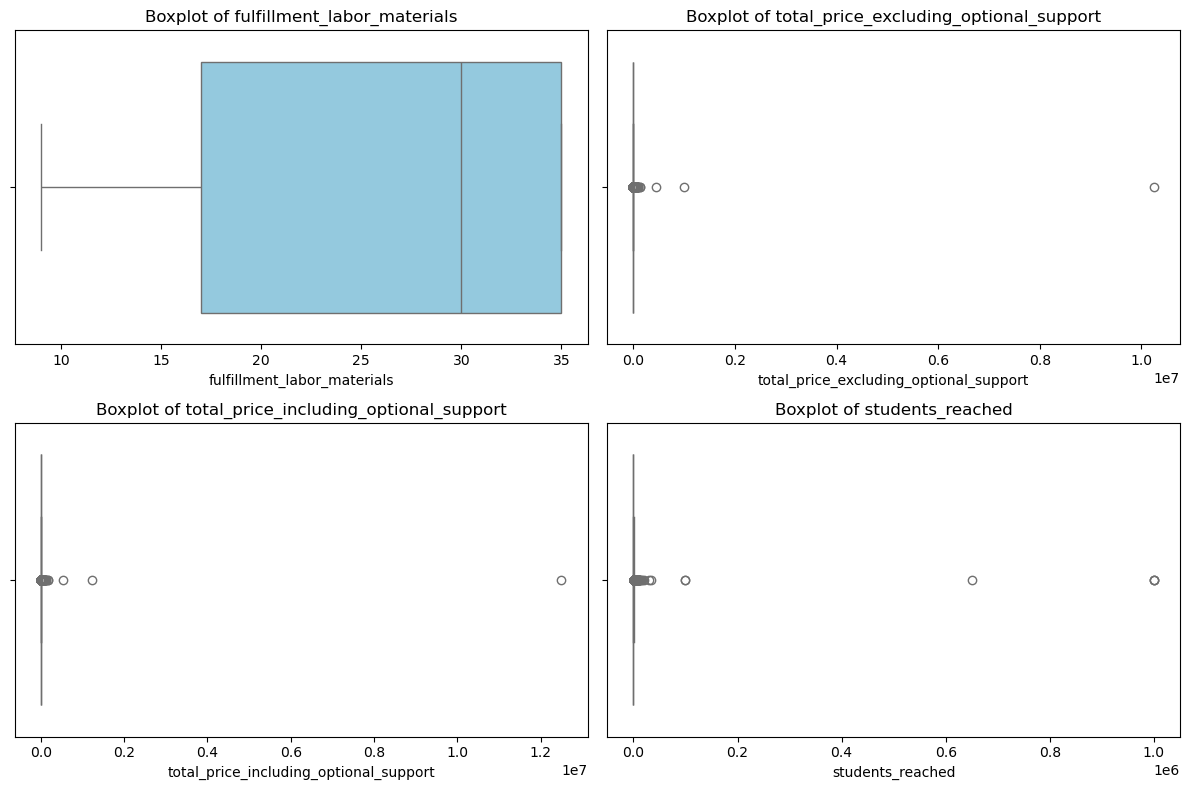

In [11]:

# numeric columns to plot to get an idea about outliers:
num_cols = [
    'fulfillment_labor_materials', 
    'total_price_excluding_optional_support', 
    'total_price_including_optional_support', 
    'students_reached'
]

# Set the size of the plots
plt.figure(figsize=(12, 8))

# Create boxplots for each numerical column
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 columns, iterate for each plot
    sns.boxplot(x=merged_df[col], color="skyblue", showfliers=True)  # showfliers to highlight outliers
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [12]:
print("Original shape:", merged_df.shape)

outlier_df = merged_df.copy()

# I first tried using IQR to remove outliers, but it was filtering out too many values that actually seemed reasonable,
# especially since things like cost and number of students can vary a lot between schools.
# So instead, I decided to just drop the negative values since costs and students can't be negative,
# and then I manually removed a few extremely large values that looked like data entry errors (like millions of dollars or students).

for col in ['fulfillment_labor_materials', 'total_price_excluding_optional_support', 
            'total_price_including_optional_support', 'students_reached']:
    outlier_df = outlier_df[outlier_df[col] >= 0]

# Define upper bounds based on manual inspection of boxplots
upper_bounds = {
    'total_price_excluding_optional_support': 5000,
    'total_price_including_optional_support': 6000,
    'students_reached': 1000
}

# Drop rows above these thresholds
for col, max_val in upper_bounds.items():
    outlier_df = outlier_df[outlier_df[col] <= max_val]

print(f"Shape after capping extreme outliers: {outlier_df.shape}")


Original shape: (619326, 24)
Shape after capping extreme outliers: (617010, 24)


In [14]:
# Apply preprocessing with specific columns

# Columns to encode
columns_to_encode = ['primary_focus_area', 'school_metro', 'grade_level',
        'poverty_level', 'resource_type', 'teacher_prefix', 'school_metro']

processed_df = preprocess_data(outlier_df, columns_to_encode)

# Display sample of processed data
print("\nSample of processed data (first 5 rows):")
display(processed_df.head())
    
# Show shape before and after
print(f"\nOriginal shape: {outlier_df.shape}")
print(f"Processed shape: {processed_df.shape}")

Starting preprocessing...
Encoded primary_focus_area into 6 dummy variables
Encoded school_metro into 2 dummy variables
Encoded grade_level into 3 dummy variables
Encoded poverty_level into 3 dummy variables
Encoded resource_type into 5 dummy variables
Encoded teacher_prefix into 4 dummy variables

Sample of processed data (first 5 rows):


,projectid,teacher_acctid,schoolid,school_zip,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,...,resource_type_Other,resource_type_Supplies,resource_type_Technology,resource_type_Trips,resource_type_Visitors,teacher_prefix_Mr.,teacher_prefix_Mr. & Mrs.,teacher_prefix_Mrs.,teacher_prefix_Ms.,days_since_posted
0,62526d85d2a1818432d03d600969e99c,0,0,60103.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,4138
1,33d59ac771b80222ad63ef0f4ac47ade,1,1,83402.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,4138
2,1a3aaeffc56dd2a421e37d8298024c0a,2,2,3038.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,4138
3,33aa19ee4da4c5adf47d0dfb84fab5ef,3,3,23224.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,4138
4,e31c0ea8b68f404699dfb0d39e9bc99b,4,4,60613.0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,4138



Original shape: (617010, 24)
Processed shape: (617010, 42)


In [18]:
print(processed_df.columns)

Index(['projectid', 'teacher_acctid', 'schoolid', 'school_zip',
       'school_charter', 'school_magnet', 'school_year_round', 'school_nlns',
       'school_kipp', 'school_charter_ready_promise',
       'fulfillment_labor_materials', 'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'date_posted', 'fully_funded', 'primary_focus_area_Health & Sports',
       'primary_focus_area_History & Civics',
       'primary_focus_area_Literacy & Language',
       'primary_focus_area_Math & Science',
       'primary_focus_area_Music & The Arts',
       'primary_focus_area_Special Needs', 'school_metro_suburban',
       'school_metro_urban', 'grade_level_Grades 6-8',
       'grade_level_Grades 9-12', 'grade_level_Grades PreK-2',
       'poverty_level_highest poverty', 'poverty_level_low poverty',
       'poverty_level_moderate poverty', 'resource_type_Other',
 

In [21]:
#dropping these after looking at correlation once
drop_these = [
    'projectid',
    'teacher_acctid',
    'schoolid', 
    'date_posted'
]

processed_df = processed_df.drop(columns=drop_these)


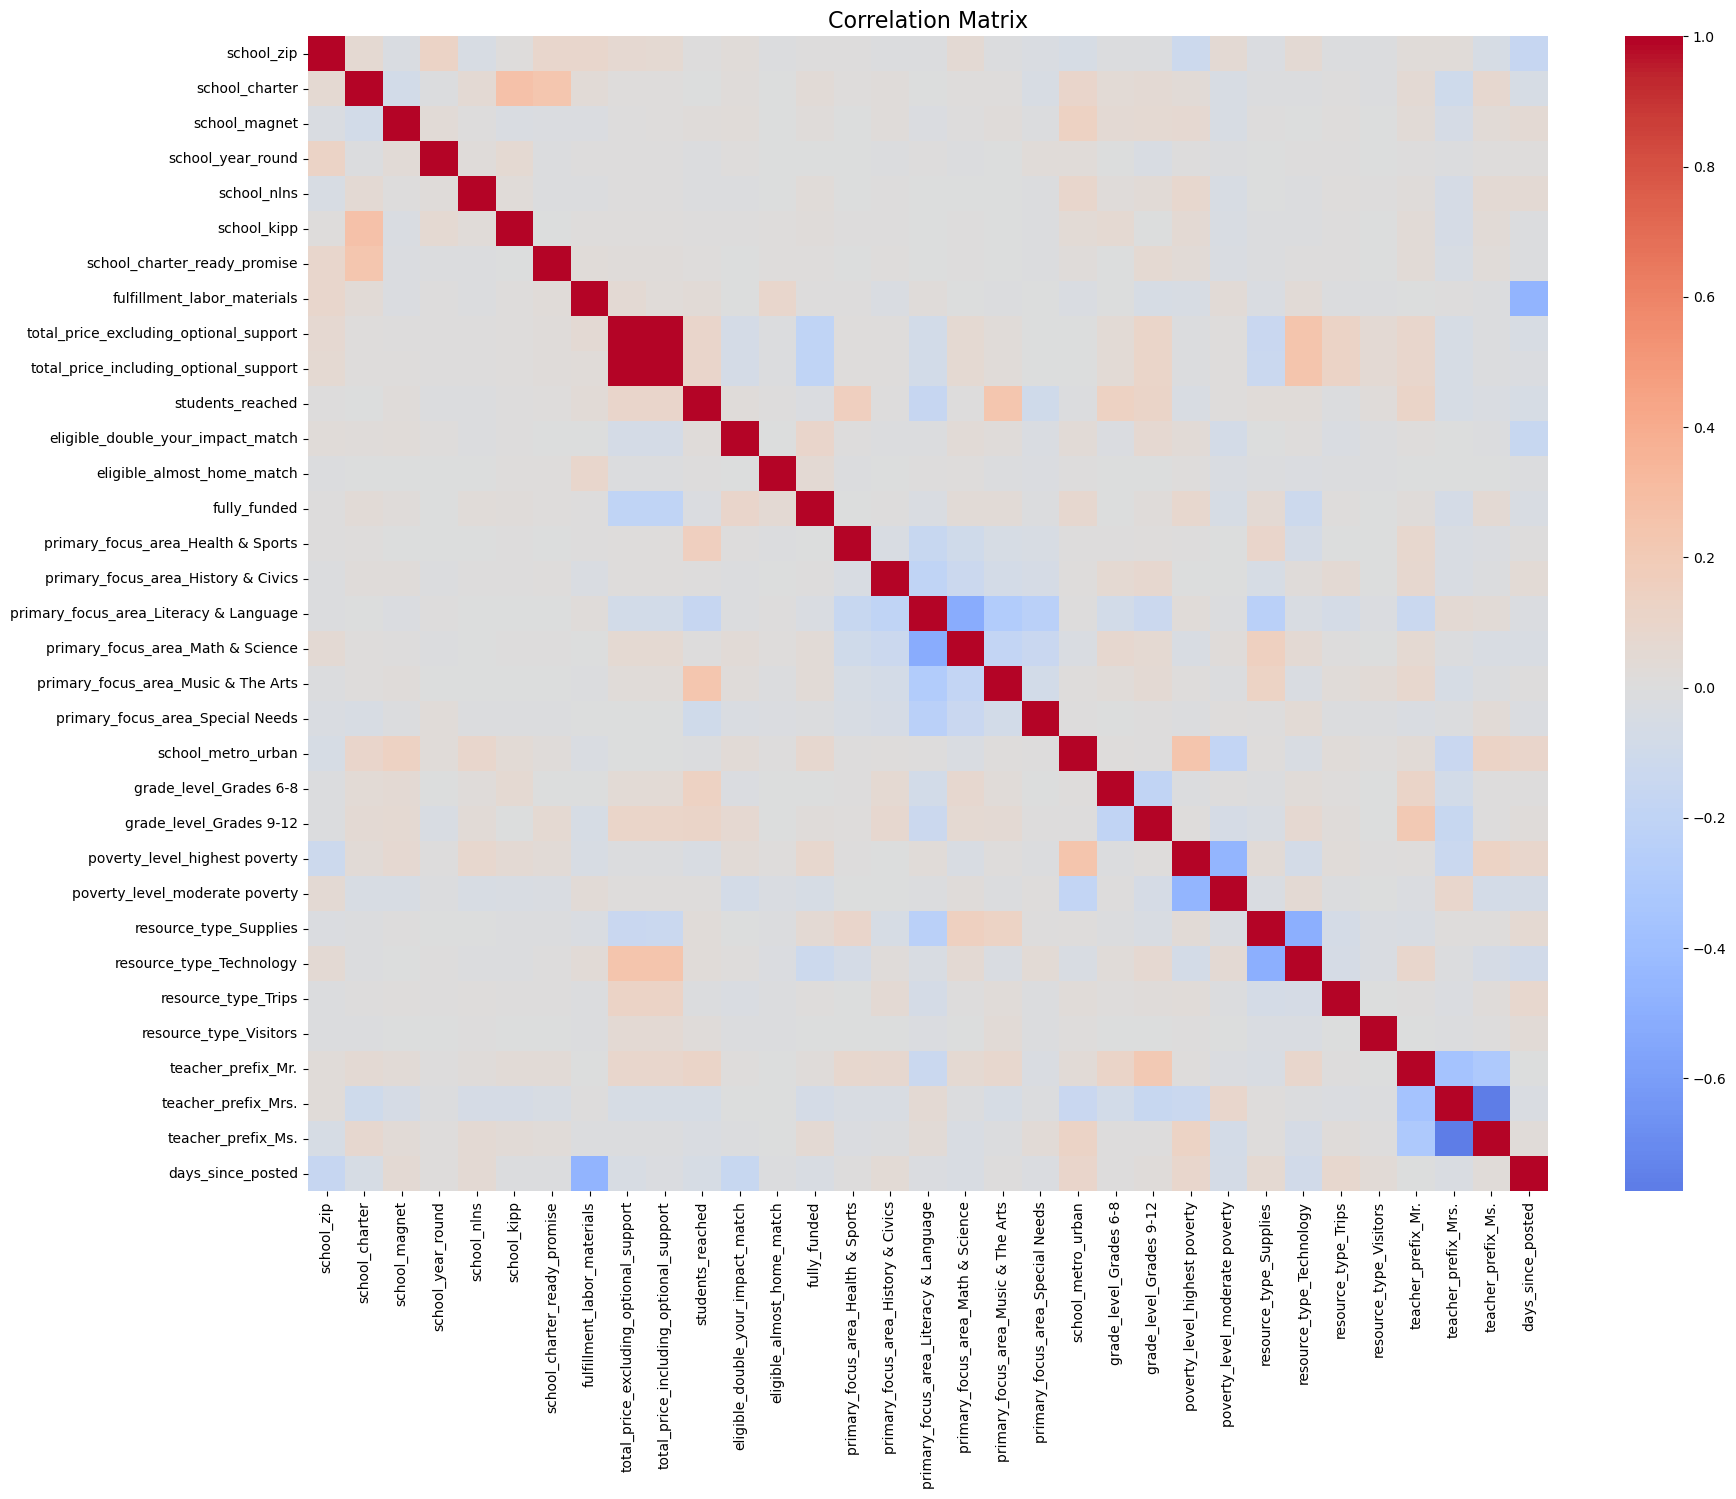

In [25]:
#correlation matrix 
correlation_matrix = plot_correlation_matrix(processed_df)

In [26]:
processed_df = processed_df.drop(columns = ['total_price_excluding_optional_support'])
#negative correlation expected among the variables which were hot-encoded

### After Cleaning

In [27]:
print(processed_df.columns)

Index(['school_zip', 'school_charter', 'school_magnet', 'school_year_round',
       'school_nlns', 'school_kipp', 'school_charter_ready_promise',
       'fulfillment_labor_materials', 'total_price_including_optional_support',
       'students_reached', 'eligible_double_your_impact_match',
       'eligible_almost_home_match', 'fully_funded',
       'primary_focus_area_Health & Sports',
       'primary_focus_area_History & Civics',
       'primary_focus_area_Literacy & Language',
       'primary_focus_area_Math & Science',
       'primary_focus_area_Music & The Arts',
       'primary_focus_area_Special Needs', 'school_metro_urban',
       'grade_level_Grades 6-8', 'grade_level_Grades 9-12',
       'poverty_level_highest poverty', 'poverty_level_moderate poverty',
       'resource_type_Supplies', 'resource_type_Technology',
       'resource_type_Trips', 'resource_type_Visitors', 'teacher_prefix_Mr.',
       'teacher_prefix_Mrs.', 'teacher_prefix_Ms.', 'days_since_posted'],
      dtype='ob

In [45]:
processed_df['fully_funded'].value_counts(normalize = True)

fully_funded
1    0.696289
0    0.303711
Name: proportion, dtype: float64

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, recall_score, precision_score

X = processed_df.drop(['fully_funded'], axis=1)

X = X.select_dtypes(exclude=['object', 'bool'])
y = processed_df['fully_funded']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=100000, test_size=0.2,
    random_state=42, stratify=y
    )


In [39]:
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Evaluate model
    print(f"Classification Report for {str(model).split('(')[0]} model:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_proba))
    
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    print(f"\nRecall: {recall}")
    print(f"Precision: {precision}")
    
    return model

In [40]:
# Train and evaluate different models
models = {
    #'Logistic Regression': LogisticRegression(max_iter=100000),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

for name, model in models.items():
    print(f"\n{name} Results:")
    train_and_evaluate_model(model, X_train, X_test, y_train, y_test)

print(f"\nBefore SMOTE - Training examples: {len(X_train)}") #Ask where SMOTE has been applied
print(f"Class distribution: {np.bincount(y_train)}")


Naive Bayes Results:
Classification Report for GaussianNB model:
              precision    recall  f1-score   support

           0       0.49      0.11      0.18     37479
           1       0.71      0.95      0.81     85923

    accuracy                           0.69    123402
   macro avg       0.60      0.53      0.50    123402
weighted avg       0.64      0.69      0.62    123402


Confusion Matrix:
[[ 4079 33400]
 [ 4266 81657]]

ROC AUC Score: 0.6556210167761409

Recall: 0.9503508955692888
Precision: 0.7097091007066063

Gradient Boosting Results:
Classification Report for GradientBoostingClassifier model:
              precision    recall  f1-score   support

           0       0.66      0.24      0.35     37479
           1       0.74      0.95      0.83     85923

    accuracy                           0.73    123402
   macro avg       0.70      0.59      0.59    123402
weighted avg       0.72      0.73      0.69    123402


Confusion Matrix:
[[ 9040 28439]
 [ 4650 81273]]

##### Baseline Model (Logistic Regression) 
##### ROC: 67.9%, Precision: 71%

In [41]:
# baseline model:

X = processed_df.drop(columns=['fully_funded']) 
y = processed_df['fully_funded'] 

# Train/test split with handling imbalance dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# model with class weight 
baseline_model = LogisticRegression(max_iter=1000000, random_state=42)
baseline_model.fit(X_train, y_train)

#predict and evaluate
y_pred = baseline_model.predict(X_test)
y_proba = baseline_model.predict_proba(X_test)[:, 1]

#matrices:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_proba))

recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
    
print(f"\nRecall: {recall}")
print(f"Precision: {precision}")

D:\aspe\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[ 4570 32909]
 [ 3441 82482]]

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.12      0.20     37479
           1       0.71      0.96      0.82     85923

    accuracy                           0.71    123402
   macro avg       0.64      0.54      0.51    123402
weighted avg       0.67      0.71      0.63    123402


ROC AUC Score:
0.67943931279418

Recall: 0.9599525156244545
Precision: 0.714804447487239


##### Feature Selection using Feature Importance - Logistic Regression - Not helpful at all

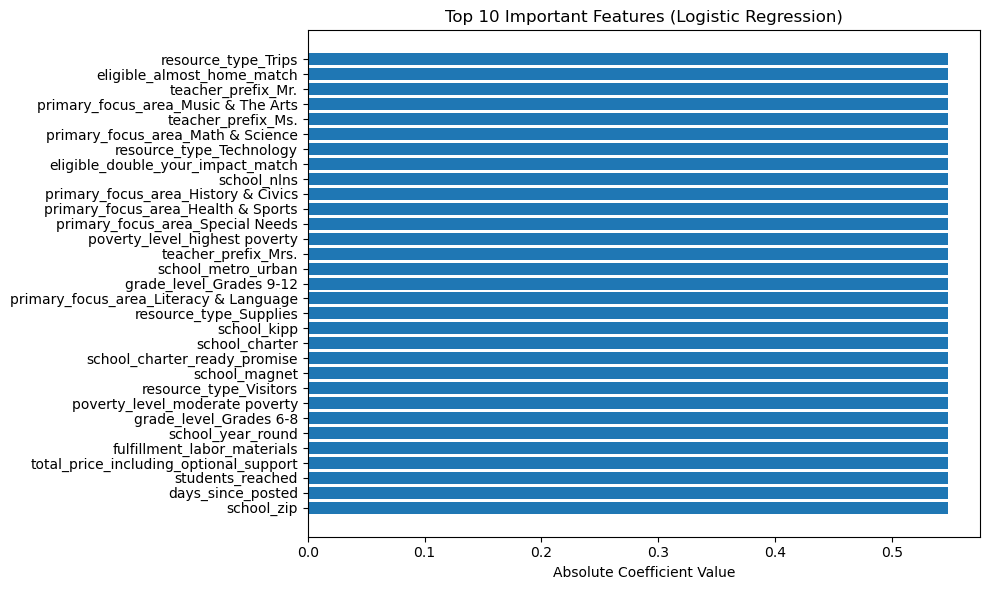

In [48]:
#feature selection

# Get feature names and coefficients
feature_names = X_train.columns
coefficients = baseline_model.coef_[0]

# Create DataFrame for importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(coefficients)  #using coefficients to get the magnitude
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting top 10
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'].head(32)[::-1], importance_df['Importance'].head(1)[::-1])
plt.xlabel("Absolute Coefficient Value")
plt.title("Top 10 Important Features (Logistic Regression)")
plt.tight_layout()
plt.show()


In [49]:
top_features = importance_df['Feature'].head(10).tolist()

X_train_reduced = X_train[top_features]
X_test_reduced = X_test[top_features]

top_feature_model = LogisticRegression(max_iter=1000000, random_state=42)
top_feature_model.fit(X_train_reduced, y_train)
y_pred_top_features  = top_feature_model.predict(X_test_reduced)
y_proba_top_features  = top_feature_model.predict_proba(X_test_reduced)[:, 1]

# Evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_top_features ))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_top_features ))

print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_proba_top_features ))


Confusion Matrix:
[[    0 37479]
 [    0 85923]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     37479
           1       0.70      1.00      0.82     85923

    accuracy                           0.70    123402
   macro avg       0.35      0.50      0.41    123402
weighted avg       0.48      0.70      0.57    123402


ROC AUC Score:
0.6144893772908501


D:\aspe\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\aspe\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\aspe\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##### Feature Matrix - Logistic Regression 
##### ROC AUC Score: 68%, Precision: 79%

In [50]:
processed_df.columns

Index(['school_zip', 'school_charter', 'school_magnet', 'school_year_round',
       'school_nlns', 'school_kipp', 'school_charter_ready_promise',
       'fulfillment_labor_materials', 'total_price_including_optional_support',
       'students_reached', 'eligible_double_your_impact_match',
       'eligible_almost_home_match', 'fully_funded',
       'primary_focus_area_Health & Sports',
       'primary_focus_area_History & Civics',
       'primary_focus_area_Literacy & Language',
       'primary_focus_area_Math & Science',
       'primary_focus_area_Music & The Arts',
       'primary_focus_area_Special Needs', 'school_metro_urban',
       'grade_level_Grades 6-8', 'grade_level_Grades 9-12',
       'poverty_level_highest poverty', 'poverty_level_moderate poverty',
       'resource_type_Supplies', 'resource_type_Technology',
       'resource_type_Trips', 'resource_type_Visitors', 'teacher_prefix_Mr.',
       'teacher_prefix_Mrs.', 'teacher_prefix_Ms.', 'days_since_posted'],
      dtype='ob

01 features: school_zip                               | ROC AUC: 0.5041 | Precision: 0.6956
02 features: school_charter                           | ROC AUC: 0.5127 | Precision: 0.6956
03 features: school_magnet                            | ROC AUC: 0.5210 | Precision: 0.6956
04 features: school_year_round                        | ROC AUC: 0.5207 | Precision: 0.6956
05 features: school_nlns                              | ROC AUC: 0.5233 | Precision: 0.6956
06 features: school_kipp                              | ROC AUC: 0.5235 | Precision: 0.6956
07 features: school_charter_ready_promise             | ROC AUC: 0.5238 | Precision: 0.6956
08 features: fulfillment_labor_materials              | ROC AUC: 0.5254 | Precision: 0.6956
09 features: total_price_including_optional_support   | ROC AUC: 0.6588 | Precision: 0.7041
10 features: students_reached                         | ROC AUC: 0.6600 | Precision: 0.7040
11 features: eligible_double_your_impact_match        | ROC AUC: 0.6591 | Precis

D:\aspe\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


26 features: resource_type_Trips                      | ROC AUC: 0.6778 | Precision: 0.7123


D:\aspe\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


27 features: resource_type_Visitors                   | ROC AUC: 0.6779 | Precision: 0.7125
28 features: teacher_prefix_Mr.                       | ROC AUC: 0.6786 | Precision: 0.7122


D:\aspe\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


29 features: teacher_prefix_Mrs.                      | ROC AUC: 0.6800 | Precision: 0.7133


D:\aspe\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


30 features: teacher_prefix_Ms.                       | ROC AUC: 0.6793 | Precision: 0.7137


D:\aspe\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


31 features: days_since_posted                        | ROC AUC: 0.6781 | Precision: 0.7139


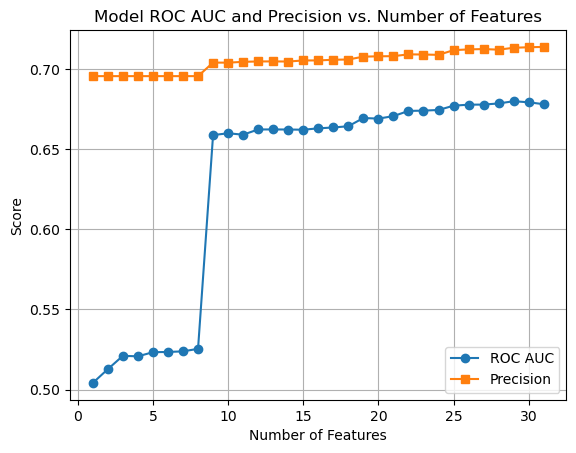

In [51]:
features = [
    'school_zip', 'school_charter', 'school_magnet', 'school_year_round',
       'school_nlns', 'school_kipp', 'school_charter_ready_promise',
       'fulfillment_labor_materials', 'total_price_including_optional_support',
       'students_reached', 'eligible_double_your_impact_match',
       'eligible_almost_home_match',
       'primary_focus_area_Health & Sports',
       'primary_focus_area_History & Civics',
       'primary_focus_area_Literacy & Language',
       'primary_focus_area_Math & Science',
       'primary_focus_area_Music & The Arts',
       'primary_focus_area_Special Needs', 'school_metro_urban',
       'grade_level_Grades 6-8', 'grade_level_Grades 9-12',
       'poverty_level_highest poverty', 'poverty_level_moderate poverty',
       'resource_type_Supplies', 'resource_type_Technology',
       'resource_type_Trips', 'resource_type_Visitors', 'teacher_prefix_Mr.',
       'teacher_prefix_Mrs.', 'teacher_prefix_Ms.', 'days_since_posted']

roc_auc_scores = []
precision_scores = []

for i in range(1, len(features)+1):
    selected_features = features[:i]
    X = processed_df[selected_features]
    y = processed_df['fully_funded']  

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = LogisticRegression(max_iter=10000)  
    model.fit(X_train, y_train)

    #predictions
    y_proba = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_proba)

    # hard predictions for precision
    y_pred = model.predict(X_test)
    prec = precision_score(y_test, y_pred)

    print(
        f"{i:02d} features: {selected_features[-1]:<40} | "
        f"ROC AUC: {auc_score:.4f} | Precision: {prec:.4f}"
    )

    roc_auc_scores.append((selected_features.copy(), auc_score))
    precision_scores.append((selected_features.copy(), prec))

# plot ROC AUC
auc_values = [a[1] for a in roc_auc_scores]
plt.plot(range(1, len(auc_values)+1), auc_values, marker='o', label="ROC AUC")

# Precision on same chart
prec_values = [p[1] for p in precision_scores]
plt.plot(range(1, len(prec_values)+1), prec_values, marker='s', label="Precision")

plt.xlabel("Number of Features")
plt.ylabel("Score")
plt.title("Model ROC AUC and Precision vs. Number of Features")
plt.legend()
plt.grid(True)
plt.show()

In [52]:
#first seven are not contributing at all, so going to ignore them 

start_index = 7  
features_to_use = features[start_index:]

X_selected_features = processed_df[features_to_use]
y_selected_features = processed_df['fully_funded']  

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_selected_features, y_selected_features, test_size=0.2, stratify=y, random_state=42)

# model with class weight 
selectedFeatures_model = LogisticRegression(max_iter=1000000, class_weight='balanced', random_state=42)
selectedFeatures_model.fit(X_train2, y_train2)

#predict and evaluate
y_pred2 = selectedFeatures_model.predict(X_test2)
y_proba2 = selectedFeatures_model.predict_proba(X_test2)[:, 1]

#matrices:
print("Confusion Matrix:")
print(confusion_matrix(y_test2, y_pred2))

print("\nClassification Report:")
print(classification_report(y_test2, y_pred2))

print("\nROC AUC Score:")
print(roc_auc_score(y_test2, y_proba2))


Confusion Matrix:
[[22393 15086]
 [28678 57245]]

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.60      0.51     37479
           1       0.79      0.67      0.72     85923

    accuracy                           0.65    123402
   macro avg       0.61      0.63      0.61    123402
weighted avg       0.68      0.65      0.66    123402


ROC AUC Score:
0.6807717484941519


In [53]:
recall = recall_score(y_test2, y_pred2)
precision = precision_score(y_test2, y_pred2)
    
print(f"\nRecall: {recall}")
print(f"Precision: {precision}")


Recall: 0.6662360485551017
Precision: 0.7914310599881103


##### Rest of the Models

In [55]:
start_index = 7  
features_to_use = features[start_index:]

X_selected_features = processed_df[features_to_use]
y_selected_features = processed_df['fully_funded']  

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_selected_features, y_selected_features, test_size=0.2, stratify=y, random_state=42)


def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Evaluate model
    print(f"Classification Report for {str(model).split('(')[0]} model:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_proba))
    
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    print(f"\nRecall: {recall}")
    print(f"Precision: {precision}")
    
    return model

# Train and evaluate different models
models = {
    #'Logistic Regression': LogisticRegression(max_iter=100000),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

for name, model in models.items():
    print(f"\n{name} Results:")
    train_and_evaluate_model(model, X_train2, X_test2, y_train2, y_test2)

print(f"Class distribution: {np.bincount(y_train)}")


Naive Bayes Results:
Classification Report for GaussianNB model:
              precision    recall  f1-score   support

           0       0.45      0.35      0.39     37479
           1       0.74      0.81      0.78     85923

    accuracy                           0.67    123402
   macro avg       0.60      0.58      0.58    123402
weighted avg       0.65      0.67      0.66    123402


Confusion Matrix:
[[13058 24421]
 [15942 69981]]

ROC AUC Score: 0.637036970832192

Recall: 0.8144617855521804
Precision: 0.7413084468549395

Gradient Boosting Results:
Classification Report for GradientBoostingClassifier model:
              precision    recall  f1-score   support

           0       0.65      0.23      0.34     37479
           1       0.74      0.95      0.83     85923

    accuracy                           0.73    123402
   macro avg       0.70      0.59      0.58    123402
weighted avg       0.71      0.73      0.68    123402


Confusion Matrix:
[[ 8449 29030]
 [ 4493 81430]]


In [ ]:
#focus on FP, precision